In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_dir = 'Data/CATS_DOGS/'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
train_path = data_dir + 'train/'
test_path = data_dir + 'test/'

In [5]:
os.listdir(train_path)

['CAT', 'DOG']

In [6]:
#os.listdir(train_path + '/CAT')- to list all the cat images
single_cat_path = train_path + 'CAT/' +'0.jpg'

In [7]:
single_cat_path

'Data/CATS_DOGS/train/CAT/0.jpg'

In [8]:
type(single_cat_path)

str

In [9]:
from matplotlib.image import imread

In [10]:
single_cat_arr = imread(single_cat_path)

In [11]:
single_cat_arr

array([[[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [240, 201, 122],
        [239, 200, 121],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [240, 201, 122],
        [239, 200, 121],
        [239, 200, 121]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [239, 200, 121]],

       ...,

       [[153, 122,  55],
        [153, 122,  55],
        [153, 122,  55],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[152, 121,  54],
        [152, 121,  54],
        [152, 121,  54],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]],

       [[151, 120,  53],
        [151, 120,  53],
        [152, 121,  54],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]]

In [12]:
single_cat_arr.shape

(375, 500, 3)

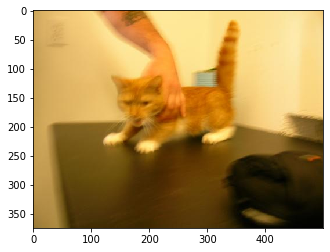

In [13]:
plt.imshow(single_cat_arr)

In [21]:
img_shape = (200,300,3)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
img_data_gen = ImageDataGenerator(shear_range=0.1,
                                  zoom_range=0.2,
                                  rotation_range=20,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=True)

In [36]:
train_data_gen = img_data_gen.flow_from_directory(train_path,
                                                  batch_size=32,
                                                  target_size=img_shape[:2],
                                                  class_mode='binary')

Found 18743 images belonging to 2 classes.


In [37]:
test_img_gen = img_data_gen.flow_from_directory(test_path,
                                                batch_size=32,
                                                target_size=img_shape[:2],
                                                class_mode='binary',
                                                shuffle=False)

Found 6251 images belonging to 2 classes.


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, MaxPool2D, Flatten, Conv2D
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(filters=32,kernel_size=3,strides=2,padding='same',input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(filters=64,kernel_size=3,strides=2,padding='same',input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(filters=64,kernel_size=3,strides=2,padding='same',input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(2))

model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 19, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 10, 64)         36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 960)              

In [42]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
model.fit_generator(train_data_gen,epochs=20,callbacks=[early_stop],validation_data=test_img_gen)

c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
473/586 [=======================>......] - ETA: 1:09 - loss: 1.0399 - accuracy: 0.5497

c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\PIL\

586/586 [==============================] - 470s 802ms/step - loss: 0.9664 - accuracy: 0.5570 - val_loss: 0.6817 - val_accuracy: 0.5772
Epoch 2/20
586/586 [==============================] - 362s 619ms/step - loss: 0.6550 - accuracy: 0.6079 - val_loss: 0.5919 - val_accuracy: 0.6833
Epoch 3/20
586/586 [==============================] - 368s 627ms/step - loss: 0.6204 - accuracy: 0.6567 - val_loss: 0.5590 - val_accuracy: 0.7093
Epoch 4/20
586/586 [==============================] - 387s 661ms/step - loss: 0.5933 - accuracy: 0.6788 - val_loss: 0.5472 - val_accuracy: 0.7157
Epoch 5/20
586/586 [==============================] - 354s 605ms/step - loss: 0.5655 - accuracy: 0.7063 - val_loss: 0.5257 - val_accuracy: 0.7485
Epoch 6/20
586/586 [==============================] - 358s 611ms/step - loss: 0.5464 - accuracy: 0.7262 - val_loss: 0.5237 - val_accuracy: 0.7266
Epoch 7/20
586/586 [==============================] - 383s 653ms/step - loss: 0.5229 - accuracy: 0.7468 - val_loss: 0.5190 - val_accura

In [46]:
loss = pd.DataFrame(model.history.history)

In [47]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.966369,0.556955,0.681711,0.577188
1,0.654966,0.607907,0.591935,0.683251
2,0.620428,0.656672,0.558979,0.709327
3,0.593252,0.678813,0.547202,0.715725
4,0.565539,0.706290,0.525690,0.748520
5,0.546421,0.726244,0.523694,0.726604
6,0.522894,0.746785,0.519030,0.745801
7,0.517257,0.751267,0.468057,0.781635
8,0.500111,0.761031,0.479547,0.777316
9,0.495174,0.760817,0.451805,0.781475


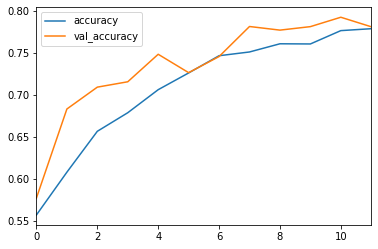

In [48]:
loss[['accuracy','val_accuracy']].plot()

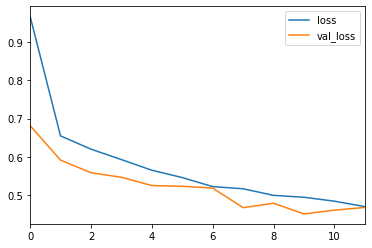

In [49]:
loss[['loss','val_loss']].plot()

In [50]:
model.save('cat_dog_classifier.h5')

In [51]:
model.evaluate_generator(test_img_gen)

c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.46868520975112915, 0.7805151343345642]

In [52]:
model.metrics_names

['loss', 'accuracy']

In [59]:
prediction = (model.predict(test_img_gen)>0.5).astype('int32')
# or prediction = model.predict_classes(test_img_gen)

In [60]:
prediction

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [64]:
test_img_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [69]:
test_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
print(classification_report(test_img_gen.classes,prediction))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79      3126
           1       0.83      0.67      0.74      3125

    accuracy                           0.77      6251
   macro avg       0.78      0.77      0.76      6251
weighted avg       0.78      0.77      0.76      6251



In [66]:
print(confusion_matrix(test_img_gen.classes,prediction))

[[2689  437]
 [1021 2104]]


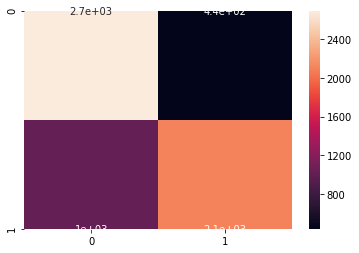

In [68]:
sns.heatmap(confusion_matrix(test_img_gen.classes,prediction),annot=True)

In [84]:
#predicting on new data
single_cat_path

'Data/CATS_DOGS/train/CAT/0.jpg'

In [70]:
from tensorflow.keras.preprocessing import image

In [74]:
new_img = image.load_img(single_cat_path,target_size=img_shape)

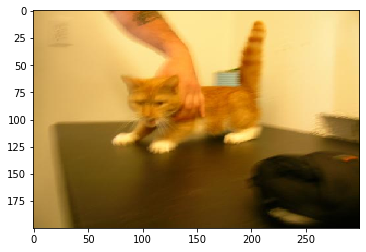

In [75]:
plt.imshow(new_img)

In [77]:
new_img_arr = image.img_to_array(new_img)

In [78]:
new_img_arr.shape

(200, 300, 3)

In [81]:
reshaped_img = new_img_arr.reshape(1,200,300,3)

In [82]:
model.predict_classes(reshaped_img)

c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]])

In [83]:
test_img_gen.class_indices

{'CAT': 0, 'DOG': 1}